In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [37]:
car=pd.read_csv(r'C:\Users\keerthi\OneDrive - HEALTH CAREERS INTERNATIONAL PTY LTD\Keerthi\Projects\Data\car_age_price.csv')

## Linear Regression

In [38]:
x = car[['Year']]
y = car['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(89, 1)
(23, 1)
(89,)
(23,)


In [39]:
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [40]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [50]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 53534.77957001264
Mean Squared Error: 4326906256.829671
RMSE: 65779.22
R^2 Score: 0.37


In [51]:
slope = model.coef_[0]
intercept = model.intercept_ 
print(f'Slope: {slope}')
print(f'Y-Intercept: {intercept}')

Slope: 43453.00373890656
Y-Intercept: -87146487.48656794


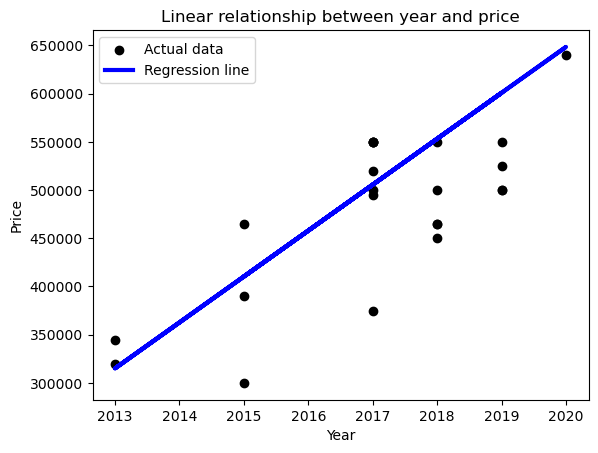

In [52]:
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear relationship between year and price')
plt.legend()
plt.show()

In [44]:
#Price predection for 2022
model.fit(x, y)
row = [2022]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 715488.079


C:\Users\keerthi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Lasso Regression

In [45]:
import numpy as np
import pandas as pd
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
car1=pd.read_csv(r'C:\Users\keerthi\OneDrive - HEALTH CAREERS INTERNATIONAL PTY LTD\Keerthi\Projects\Data\car_age_price.csv')

In [47]:
X = car1[['Year']]
y = car1['Price']

In [48]:
# Find alpa value
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -47318.131
Config: {'alpha': 0.99}


In [49]:
# Price prediction for 2022
model = Lasso(alpha=0.99)
model.fit(X, y)
row = [2022]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 715486.074


C:\Users\keerthi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
